## Faster GPUs

With Colab Pro you have priority access to our fastest GPUs and with Pro+ even more so. For example, you may get a T4 or P100 GPU at times when most users of standard Colab receive a slower K80 GPU. You can see what GPU you've been assigned at any time by executing the following cell.

If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to Runtime > Change runtime type in the menu to enable a GPU accelerator, and then re-execute the code cell.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 11 17:52:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In order to use a GPU with your notebook, select the Runtime > Change runtime type menu, and then set the hardware accelerator dropdown to GPU.

## More memory

With Colab Pro you have the option to access high-memory VMs when they are available, and with Pro+ even more so. To set your notebook preference to use a high-memory runtime, select the Runtime > 'Change runtime type' menu, and then select High-RAM in the Runtime shape dropdown.

You can see how much memory you have available at any time by running the following code cell.



If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via Runtime > Change runtime type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
genres = ['Action','Adventure', 'Animation',"Children's",'Comedy','Crime',
 'Documentary','Drama','Fantasy','Film-Noir', 'Horror','Musical','Mystery',
 'Romance','Sci-Fi','Thriller','War','Western']
              
ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'sorted_100k.csv')
STATE_SIZE = 10              

        
              
              
              


In [ ]:
import pandas as pd
             
ratings = pd.read_csv(DATA_DIR, header=0,names=['userId', 'movieId', 'rating', 'timestamp'])
ratings.head(5)
  


,userId,movieId,rating,timestamp
0,1,55,5,875072688
1,1,203,4,878542231
2,1,183,5,875072262
3,1,150,5,876892196
4,1,68,4,875072688


# Making the Most of your Colab Subscription



In [ ]:
movie_df = pd.read_csv(os.path.join(ROOT_DIR, "u.item"), sep="|", encoding='latin-1', header=None)
movie_df.columns = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movie_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:

movie_df['MovieID'] = movie_df['movie id'].apply(pd.to_numeric)
movies_genres_df = movie_df[['MovieID']]



In [ ]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,55,5,875072688
1,1,203,4,878542231
2,1,183,5,875072262
3,1,150,5,876892196
4,1,68,4,875072688


In [ ]:
import tensorflow as tf

class UserMovieEmbedding(tf.keras.Model):
    def __init__(self, len_users, len_movies, embedding_size):
        super(UserMovieEmbedding, self).__init__()
        self.m_u_input = tf.keras.layers.InputLayer(name='input_layer', input_shape=(2,))
        # embedding
        self.u_embedding = tf.keras.layers.Embedding(name='user_embedding', input_dim=len_users, output_dim=embedding_size)
        self.m_embedding = tf.keras.layers.Embedding(name='item_embedding', input_dim=len_movies, output_dim=embedding_size)
        # dot product
        #64,100  64 100 -> 64 100
        self.m_u_merge = tf.keras.layers.Dot(name='item_user_dot', normalize=False, axes=1)
        # output
        self.m_u_fc = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.m_u_input(x)
        uemb = self.u_embedding(x[0])
        memb = self.m_embedding(x[1])
        m_u = self.m_u_merge([memb, uemb])
        return self.m_u_fc(m_u)
  

In [ ]:
import numpy as np
MAX_EPOCH = 150
INIT_USER_BATCH_SIZE = 64
FINAL_USER_BATCH_SIZE = 1024

user_movie_rating_df = ratings[['userId', 'movieId', 'rating']]



In [ ]:
user_movie_rating_df = user_movie_rating_df.apply(np.int32)
LEN_MOVIES = max(movies_genres_df["MovieID"]) + 1
LEN_USERS = max(user_movie_rating_df['userId']) + 1
EMBEDDING_SIZE = 100

test_model = UserMovieEmbedding(LEN_USERS, LEN_MOVIES, EMBEDDING_SIZE)
print(LEN_USERS)
print(LEN_MOVIES)

944
1683


In [ ]:
test_model([np.zeros((1)), np.zeros((1))])
print(test_model.summary())

Model: "user_movie_embedding_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 user_embedding (Embedding)  multiple                  94400     
                                                                 
 item_embedding (Embedding)  multiple                  168300    
                                                                 
 item_user_dot (Dot)         multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  2         
                                                                 
Total params: 262,702
Trainable params: 262,702
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
modified_user_movie_rating_df = user_movie_rating_df.apply(np.int32)
index_names = modified_user_movie_rating_df[modified_user_movie_rating_df['rating']<4].index
modified_user_movie_rating_df = modified_user_movie_rating_df.drop(index_names)
modified_user_movie_rating_df = modified_user_movie_rating_df.drop('rating', axis=1)
u_m_pairs = modified_user_movie_rating_df.to_numpy()
u_m_pairs[:5]

array([[  1,  55],
       [  1, 203],
       [  1, 183],
       [  1, 150],
       [  1,  68]], dtype=int32)

In [ ]:
positive_user_movie_dict = {u : [] for u in range(1, max(modified_user_movie_rating_df['userId'])+1)}
for data in modified_user_movie_rating_df.iterrows():
    positive_user_movie_dict[data[1][0]].append(data[1][1])
positive_user_movie_dict[1]

[55,
 203,
 183,
 150,
 68,
 157,
 184,
 210,
 163,
 146,
 176,
 144,
 160,
 33,
 44,
 14,
 265,
 25,
 251,
 195,
 242,
 42,
 168,
 128,
 123,
 208,
 248,
 119,
 135,
 191,
 187,
 166,
 12,
 90,
 43,
 165,
 197,
 198,
 81,
 258,
 173,
 47,
 124,
 95,
 96,
 61,
 185,
 58,
 212,
 108,
 209,
 89,
 7,
 107,
 268,
 175,
 75,
 51,
 151,
 48,
 267,
 169,
 192,
 178,
 87,
 238,
 156,
 46,
 154,
 214,
 241,
 100,
 171,
 86,
 65,
 66,
 77,
 224,
 23,
 230,
 161,
 162,
 190,
 199,
 57,
 50,
 39,
 196,
 113,
 202,
 106,
 253,
 129,
 170,
 9,
 127,
 257,
 20,
 16,
 236,
 246,
 181,
 45,
 222,
 193,
 79,
 22,
 223,
 115,
 227,
 182,
 109,
 91,
 137,
 250,
 72,
 249,
 56,
 82,
 32,
 121,
 114,
 132,
 174,
 234,
 228,
 204,
 133,
 270,
 3,
 229,
 256,
 235,
 152,
 1,
 207,
 80,
 239,
 19,
 134,
 172,
 194,
 64,
 88,
 221,
 52,
 177,
 76,
 269,
 28,
 13,
 60,
 111,
 206,
 15,
 84,
 18,
 93,
 59,
 98,
 6,
 216,
 186]

In [ ]:
def generate_user_movie_batch(positive_pairs, batch_size, negative_ratio=0.5):
    batch = np.zeros((batch_size, 3))
    positive_batch_size = batch_size - int(batch_size*negative_ratio)
    max_user_id = max(modified_user_movie_rating_df['userId'])+1
    max_movie_id = max(modified_user_movie_rating_df['movieId'])+1
    
    while True:
        idx = np.random.choice(len(positive_pairs), positive_batch_size)
        data = positive_pairs[idx]
        for i, d in enumerate(data):
            batch[i] = (d[0], d[1], 1)
        
        while i+1 < batch_size:
            u = np.random.randint(1, max_user_id)
            m = np.random.randint(1, max_movie_id)
            if m not in positive_user_movie_dict[u]:
                i += 1
                batch[i] = (u, m, 0)
        
        np.random.shuffle(batch)
        yield batch[:,0], batch[:,1], batch[:,2]

In [ ]:
optimizer = tf.keras.optimizers.Adam()
# loss
bce = tf.keras.losses.BinaryCrossentropy()


test_train_loss = tf.keras.metrics.Mean(name='train_loss')
test_train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

In [ ]:
@tf.function
def test_train_step(test_inputs, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = test_model(test_inputs, training=True)
        loss = bce(labels, predictions)
    gradients = tape.gradient(loss, test_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, test_model.trainable_variables))

    test_train_loss(loss)
    test_train_accuracy(labels, predictions)

In [ ]:
test_losses = []
MAX_EPOCH = 50
for epoch in range(MAX_EPOCH):
    
    batch_size = INIT_USER_BATCH_SIZE * (epoch+1)
    if batch_size > FINAL_USER_BATCH_SIZE:
        batch_size = FINAL_USER_BATCH_SIZE
    test_generator = generate_user_movie_batch(u_m_pairs, batch_size)
    
    for step in range(len(user_movie_rating_df)//batch_size):
        # embedding layer update
        u_batch, m_batch, u_m_label_batch = next(test_generator)
        test_train_step([u_batch, m_batch], u_m_label_batch)
        
        print(f'{epoch} epoch, Batch size : {batch_size}, {step} steps, Loss: {test_train_loss.result():0.4f}, Accuracy: {test_train_accuracy.result() * 100:0.1f}')

    test_losses.append(test_train_loss.result())

Streaming output truncated to the last 5000 lines.
5 epoch, Batch size : 384, 9 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 10 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 11 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 12 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 13 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 14 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 15 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 16 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 17 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 18 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 19 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 20 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 21 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384, 22 steps, Loss: 0.0417, Accuracy: 98.5
5 epoch, Batch size : 384,

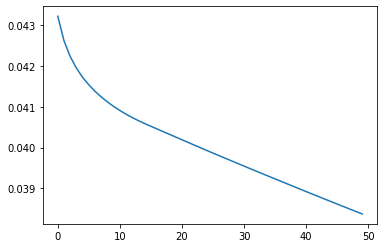

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_losses)

test_model.save_weights('./user_movie_embedding_100k.h5')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). While Colab Pro subscribers still have limits, these will be roughly twice the limits for non-subscribers, with even more stability for Pro+.

## Resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab Pro and Pro+, please avoid using resources when you don't need them. For example, only use a GPU or high-RAM runtime when required, and close Colab tabs when finished.


## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+. If you are interested in unlimited pay as you go usage to remove all imposed limits, please do let us know.

If you encounter errors or other issues with billing (payments) for Colab Pro or Pro+, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
